## EJEMPLO "PAÍSES Y ESPERANZA DE VIDA"

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('Esperanzadevida.xlsx')

# View the first few rows of the DataFrame
df.head()

print(df)

             PAIS  m0  m25  m50  m75  w0  w25  w50  w75
0         Algeria  63   51   30   13  67   54   34   15
1        Cameroon  34   29   13    5  38   32   17    6
2      Madagascar  38   30   17    7  38   34   20    7
3       Mauritius  59   42   20    6  64   46   25    8
4         Reunion  56   38   18    7  62   46   25   10
5      Seychelles  62   44   24    7  69   50   28   14
6    South_Africa  65   44   22    7  72   50   27    9
7         Tunisia  56   46   24   11  63   54   33   19
8          Canada  69   47   24    8  75   53   29   10
9      Costa_Rica  65   48   26    9  68   50   27   10
10  Dominican_Rep  64   50   28   11  66   51   29   11
11    El_Salvador  56   44   25   10  61   48   27   12
12      Greenland  60   44   22    6  65   45   25    9
13        Grenada  61   45   22    8  65   49   27   10
14      Guatemala  49   40   22    9  51   41   23    8
15       Honduras  59   42   22    6  61   43   22    7
16        Jamaica  63   44   23    8  67   48   

Vamos a crear un mapa de calor (con un clustering jerárquico básico incluido) para hacer un análisis exploratio de las variables por países

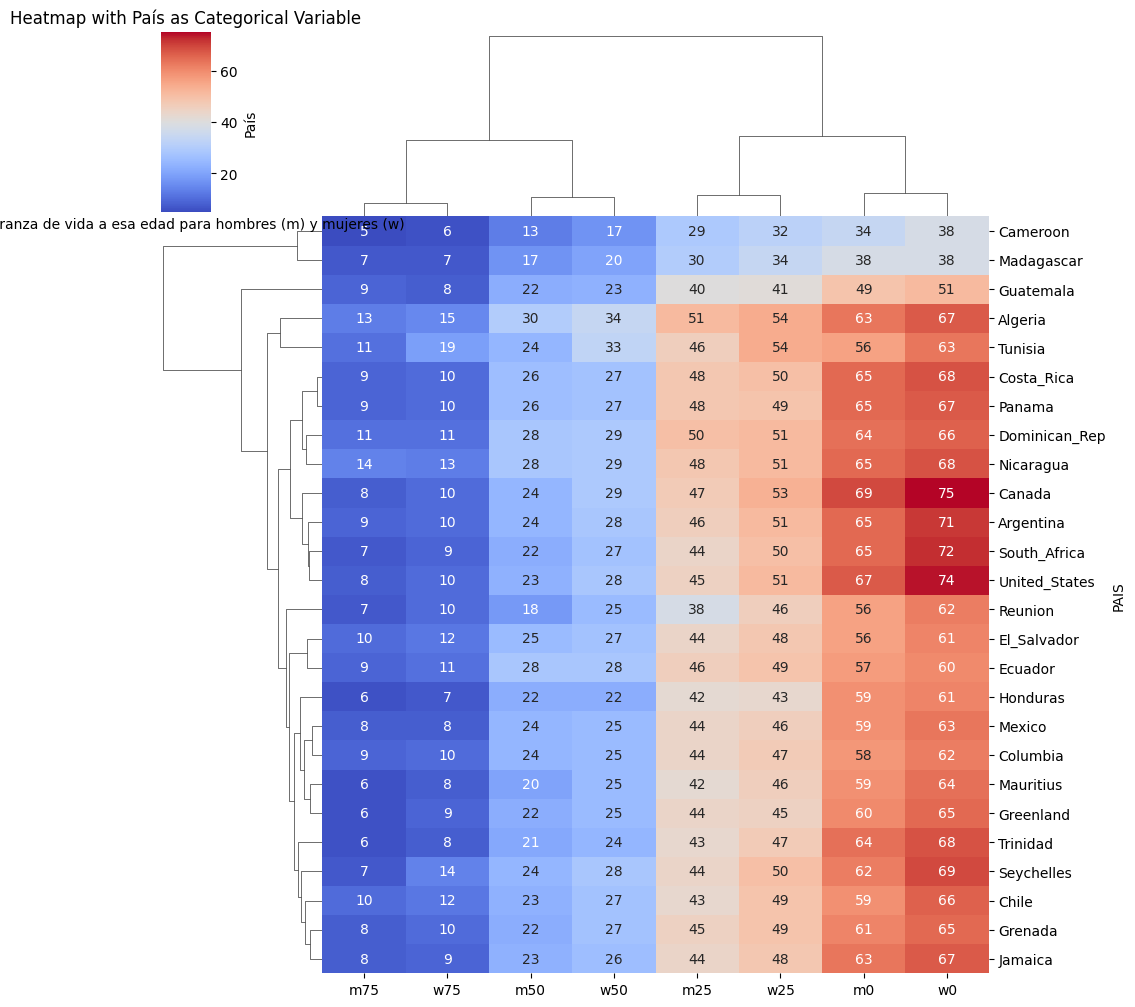

In [ ]:
import seaborn as sns

# Set 'PAIS' as the index
df = df.set_index('PAIS')
# Extract the index labels
PAIS_labels = df.index

# Create the heatmap
#sns.heatmap(df, cmpa='coolwarm', annot=True)
#clustered heatmap
sns.clustermap(df, cmap='coolwarm', annot=True)

# Customize the plot if needed
plt.title('Heatmap with País as Categorical Variable')
plt.xlabel('Esperanza de vida a esa edad para hombres (m) y mujeres (w)')
plt.ylabel('País')

# Display the plot
plt.show()


In [ ]:
from scipy.spatial import distance

# Calculate the pairwise Euclidean distances
distance_matrix = distance.cdist(df, df, 'euclidean')

# The distance_matrix is a 2D array containing the Euclidean distances
# between all pairs of observations.
print("Distance Matrix:")
distance_small = distance_matrix[:5, :5]
#Index are added to the distance matrix
distance_small = pd.DataFrame(distance_small, index=df.index[:5], columns=df.index[:5])

distance_small_rounded = distance_small.round(2)
print(distance_small_rounded)

Distance Matrix:
PAIS        Algeria  Cameroon  Madagascar  Mauritius  Reunion
PAIS                                                         
Algeria        0.00     58.08       52.65      21.19    24.35
Cameroon      58.08      0.00        7.14      42.24    38.03
Madagascar    52.65      7.14        0.00      37.96    33.81
Mauritius     21.19     42.24       37.96       0.00     6.16
Reunion       24.35     38.03       33.81       6.16     0.00


In [ ]:
df[:2]

,m0,m25,m50,m75,w0,w25,w50,w75
PAIS,,,,,,,,
Algeria,63,51,30,13,67,54,34,15
Cameroon,34,29,13,5,38,32,17,6


#Representamos la matriz de distancias visualmente

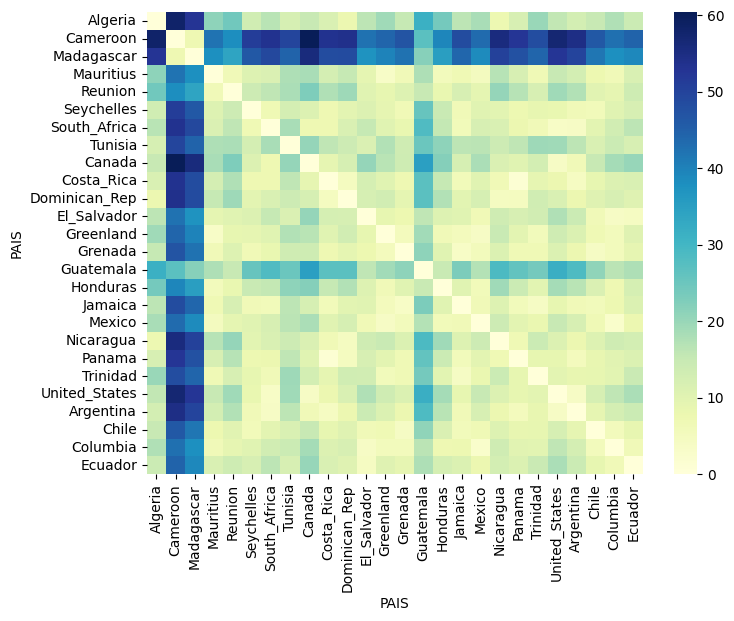

In [ ]:
plt.figure(figsize=(8, 6))
df_distance = pd.DataFrame(distance_matrix, index = df.index, columns = df.index)
sns.heatmap(df_distance, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

Now is reordered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


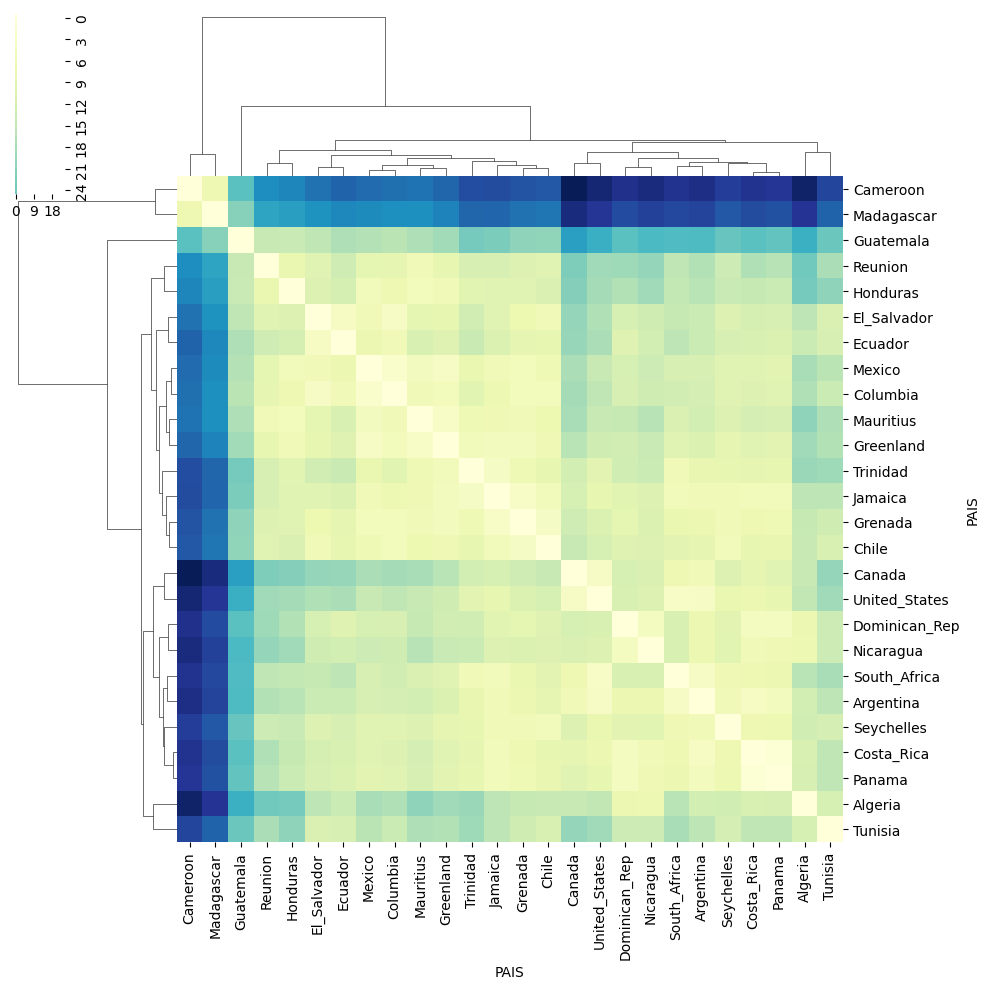

In [ ]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns.clustermap(df_distance, cmap="YlGnBu", fmt=".1f", annot=False, method='average').dendrogram_row.linkage

# Reorder the data based on the hierarchical clustering
order = pd.DataFrame(linkage, columns=['cluster_1', 'cluster_2', 'distance', 'new_count']).index
reordered_data = df.reindex(index=order, columns=order)

# Optionally, you can add color bar
sns.heatmap(reordered_data, cmap="YlGnBu", fmt=".1f", cbar=False)
plt.show()

Standarizing the variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame to standardize the columns
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_std)

          m0       m25       m50       m75        w0       w25       w50  \
0   0.484661  1.485448  1.910752  2.144391  0.398812  1.268798  2.217004   
1  -3.169682 -2.963119 -2.860730 -1.635553 -2.905632 -3.000334 -2.707195   
2  -2.665635 -2.760912 -1.738029 -0.690567 -2.905632 -2.612231 -1.838219   
3  -0.019386 -0.334420 -0.896002 -1.163060  0.056973 -0.283614 -0.389925   
4  -0.397422 -1.143251 -1.457353 -0.690567 -0.170920 -0.283614 -0.389925   
5   0.358649  0.069995  0.226699 -0.690567  0.626705  0.492592  0.479051   
6   0.736685  0.069995 -0.334651 -0.690567  0.968544  0.492592  0.189392   
7  -0.397422  0.474410  0.226699  1.199405 -0.056973  1.268798  1.927345   
8   1.240732  0.676618  0.226699 -0.218074  1.310383  1.074747  0.768710   
9   0.736685  0.878825  0.788050  0.254419  0.512759  0.492592  0.189392   
10  0.610673  1.283241  1.349401  1.199405  0.284866  0.686644  0.768710   
11 -0.397422  0.069995  0.507375  0.726912 -0.284866  0.104489  0.189392   
12  0.106625

In [ ]:
# Calculate the pairwise Euclidean distances
distance_std = distance.cdist(df_std, df_std,"euclidean")

print(distance_std[:5,:5].round(2))

[[ 0.   11.6  10.02  6.19  6.32]
 [11.6   0.    1.87  6.56  6.02]
 [10.02  1.87  0.    5.5   4.9 ]
 [ 6.19  6.56  5.5   0.    1.39]
 [ 6.32  6.02  4.9   1.39  0.  ]]


Recalculamos la matriz de distancias y la representamos con los datos estandarizados.

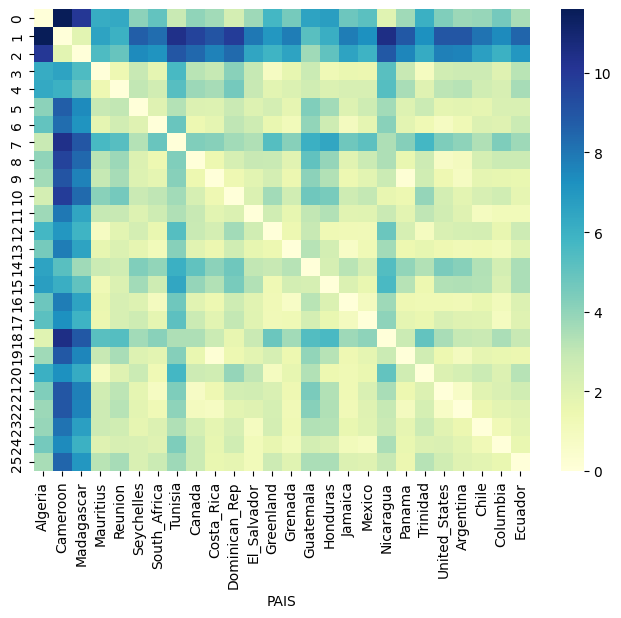

In [ ]:
plt.figure(figsize=(8, 6))
df_std_distance = pd.DataFrame(distance_std, index = df_std.index, columns = df.index)
sns.heatmap(df_std_distance, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


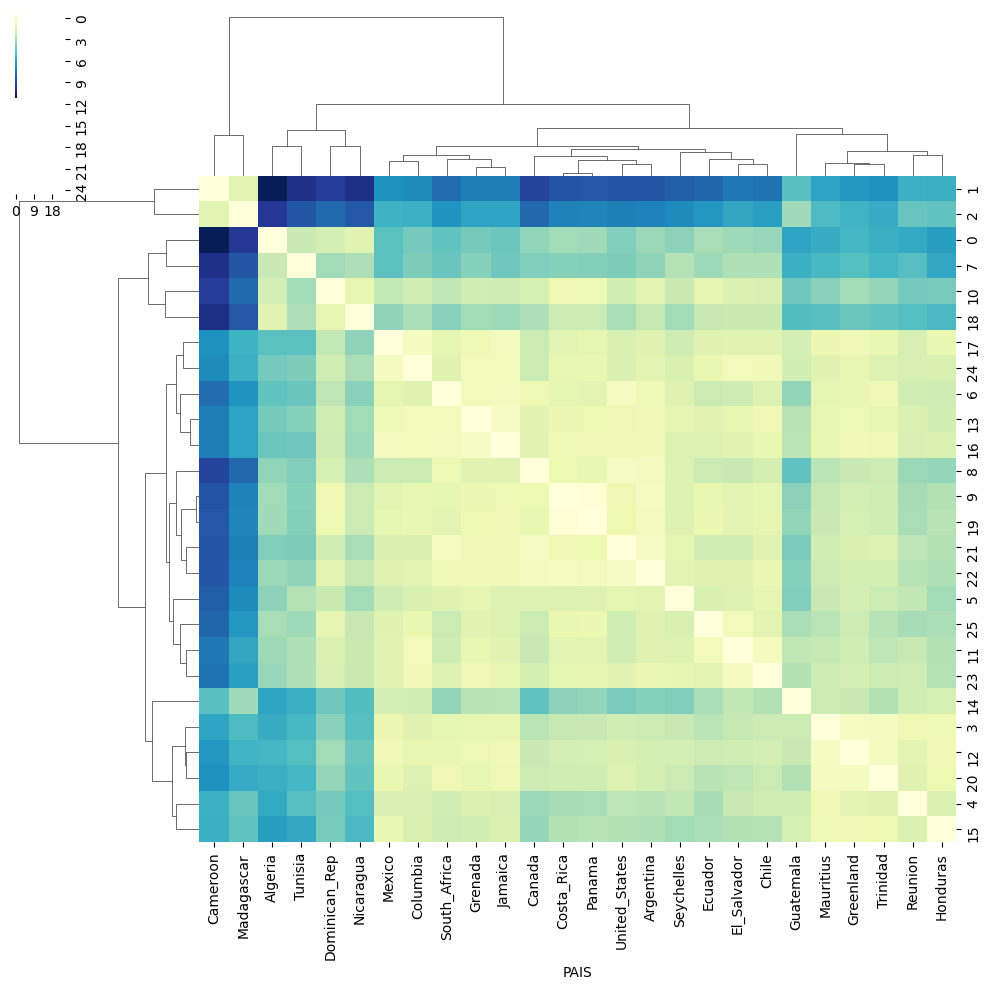

In [ ]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns.clustermap(df_std_distance, cmap="YlGnBu", fmt=".1f", annot=False, method='average').dendrogram_row.linkage

# Reorder the data based on the hierarchical clustering
order = pd.DataFrame(linkage, columns=['cluster_1', 'cluster_2', 'distance', 'new_count']).index
reordered_data = df.reindex(index=order, columns=order)

# Optionally, you can add color bar
sns.heatmap(reordered_data, cmap="YlGnBu", fmt=".1f", cbar=False)
plt.show()

<ipython-input-16-53922194919f>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(df_std_distance, method='ward')  # You can choose a different linkage method if needed


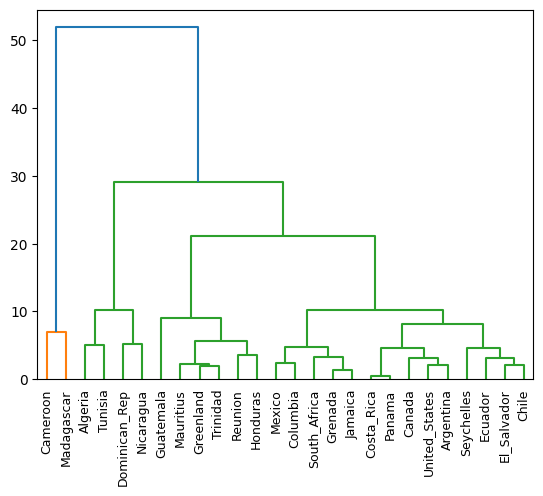

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Calculate the linkage matrix
linkage_matrix = sch.linkage(df_std_distance, method='ward')  # You can choose a different linkage method if needed

# Create the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, labels=df.index, leaf_font_size=9, leaf_rotation=90)

# Display the dendrogram
plt.show()


# Asignamos cada observación a uno de los 4 clústeres (nos quedamos con ese número)

In [ ]:
# Assign data points to 4 clusters
num_clusters = 4
cluster_assignments = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Display the cluster assignments
print("Cluster Assignments:", cluster_assignments)

# Display the dendrogram
plt.show()

Cluster Assignments: [2 1 1 3 3 4 4 2 4 4 2 4 3 4 3 3 4 4 2 4 3 4 4 4 4 4]


# Añadimos la nueva variable a nustro data frame

In [ ]:
# Create a new column 'Cluster' and assign the 'cluster_assignments' values to it
df['Cluster4'] = cluster_assignments

# Now 'df' contains a new column 'Cluster' with the cluster assignments

print(df["Cluster4"])

PAIS
Algeria          2
Cameroon         1
Madagascar       1
Mauritius        3
Reunion          3
Seychelles       4
South_Africa     4
Tunisia          2
Canada           4
Costa_Rica       4
Dominican_Rep    2
El_Salvador      4
Greenland        3
Grenada          4
Guatemala        3
Honduras         3
Jamaica          4
Mexico           4
Nicaragua        2
Panama           4
Trinidad         3
United_States    4
Argentina        4
Chile            4
Columbia         4
Ecuador          4
Name: Cluster4, dtype: int32


# Representación de los datos y su pertenencia a los clusters

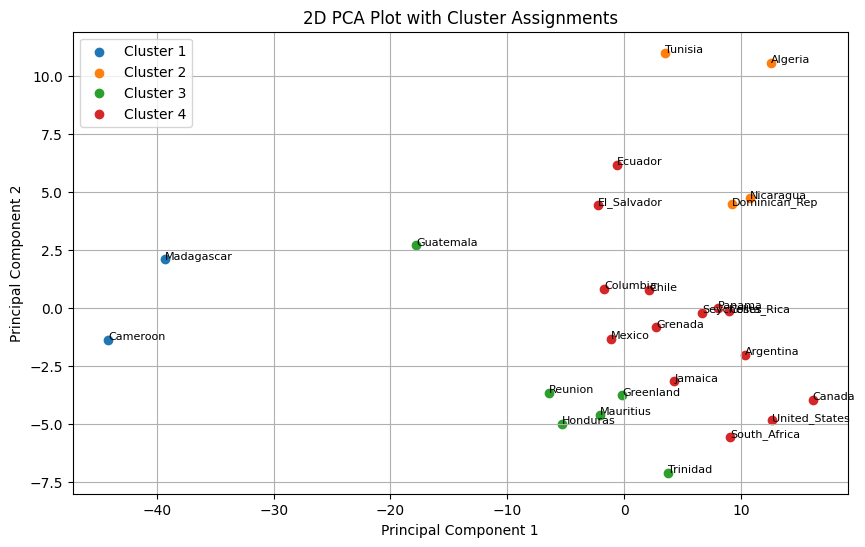

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'df' is your original DataFrame with data
# 'cluster_assignments' contains cluster assignments

# Step 1: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create a new DataFrame for the 2D principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(cluster_assignments):
    plt.scatter(df_pca.loc[cluster_assignments == cluster, 'PC1'],
                df_pca.loc[cluster_assignments == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(df.index[i]), fontsize=8)

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## Clustering no jerárquico

#Kmeans

In [ ]:
from sklearn.cluster import KMeans

# Set the number of clusters (k=4)
k = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the KMeans model to your standardized data
kmeans.fit(df_std)

# Get the cluster labels for your data
kmeans_cluster_labels = kmeans.labels_

print(kmeans_cluster_labels)



[1 3 3 0 0 2 2 1 2 2 1 2 0 2 0 0 2 0 1 2 0 2 2 2 2 2]


Repetimos el gráfico anterior con el k-means. ¿Será igual el gráfico?

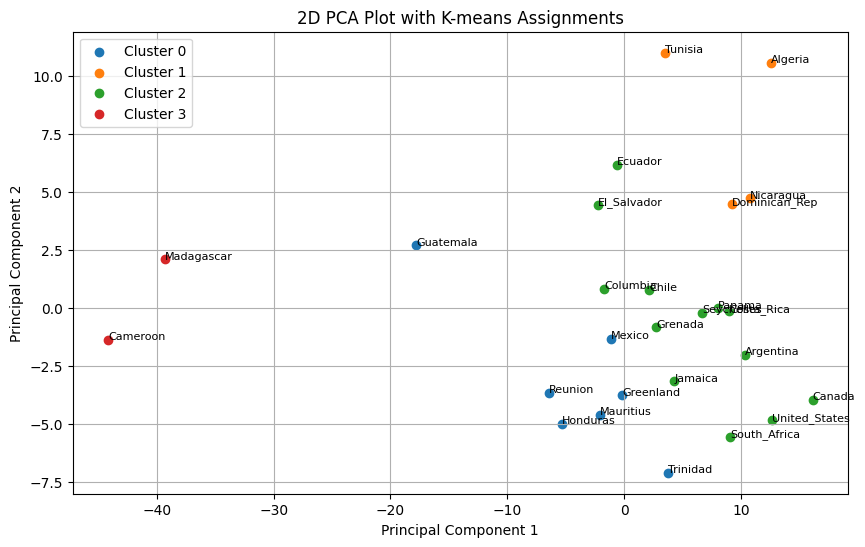

In [ ]:
# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(kmeans_cluster_labels):
    plt.scatter(df_pca.loc[kmeans_cluster_labels == cluster, 'PC1'],
                df_pca.loc[kmeans_cluster_labels == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(df.index[i]), fontsize=8)

plt.title("2D PCA Plot with K-means Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

# EL método DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)

# Ajustar el modelo a los datos
dbscan.fit(df_std)

# Obtener las etiquetas de cluster asignadas por DBSCAN
dbscan_labels = dbscan.labels_
print(dbscan_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


Los parámetros anteriores no funcionan (sale 1 sólo cluster de "ruido"). Por ello iteramos en eps y min_samples para lograr diferentes soluciones en busca de un k razonable.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Definir valores para eps y min_samples
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = np.arange(2, 12)

# Inicializar variables para el número de clusters y los parámetros correspondientes
num_clusters_prev = None
eps_best = None
min_samples_best = None
num_iterations = 0

# Iterar sobre diferentes valores de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Crear el modelo DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo a los datos
        dbscan.fit(df_std)

        # Obtener el número de clusters
        num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

        # Mostrar el número de clusters y los parámetros de DBSCAN si cambia el número de clusters
        if num_clusters != num_clusters_prev:
            print(f"Iteración {num_iterations + 1}: eps={eps}, min_samples={min_samples}, Número de clusters={num_clusters}")
            num_clusters_prev = num_clusters
            eps_best = eps
            min_samples_best = min_samples

        num_iterations += 1
        # Parar si se alcanzan las 100 iteraciones
        if num_iterations >= 100:
            break
    if num_iterations >= 100:
        break


Iteración 1: eps=0.1, min_samples=2, Número de clusters=0
Iteración 21: eps=0.30000000000000004, min_samples=2, Número de clusters=1
Iteración 22: eps=0.30000000000000004, min_samples=3, Número de clusters=0
Iteración 31: eps=0.4, min_samples=2, Número de clusters=1
Iteración 32: eps=0.4, min_samples=3, Número de clusters=0
Iteración 41: eps=0.5, min_samples=2, Número de clusters=1
Iteración 42: eps=0.5, min_samples=3, Número de clusters=0
Iteración 51: eps=0.6, min_samples=2, Número de clusters=1
Iteración 52: eps=0.6, min_samples=3, Número de clusters=0
Iteración 61: eps=0.7000000000000001, min_samples=2, Número de clusters=1
Iteración 62: eps=0.7000000000000001, min_samples=3, Número de clusters=0
Iteración 71: eps=0.8, min_samples=2, Número de clusters=3
Iteración 72: eps=0.8, min_samples=3, Número de clusters=1
Iteración 73: eps=0.8, min_samples=4, Número de clusters=0
Iteración 81: eps=0.9, min_samples=2, Número de clusters=3
Iteración 82: eps=0.9, min_samples=3, Número de cluste

Pues vamos a coger k = 3 para poder comparar un poco con el K-means para un valor razonablemente bueno (se vio en el dendrograma...).

In [ ]:
# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)

# Ajustar el modelo a los datos
dbscan.fit(df_std)

# Obtener las etiquetas de cluster asignadas por DBSCAN
dbscan_labels = dbscan.labels_
print(dbscan_labels)

[-1 -1 -1 -1 -1 -1 -1 -1  0  1 -1 -1 -1  2 -1 -1  2 -1 -1  1 -1  0  0 -1
 -1 -1]


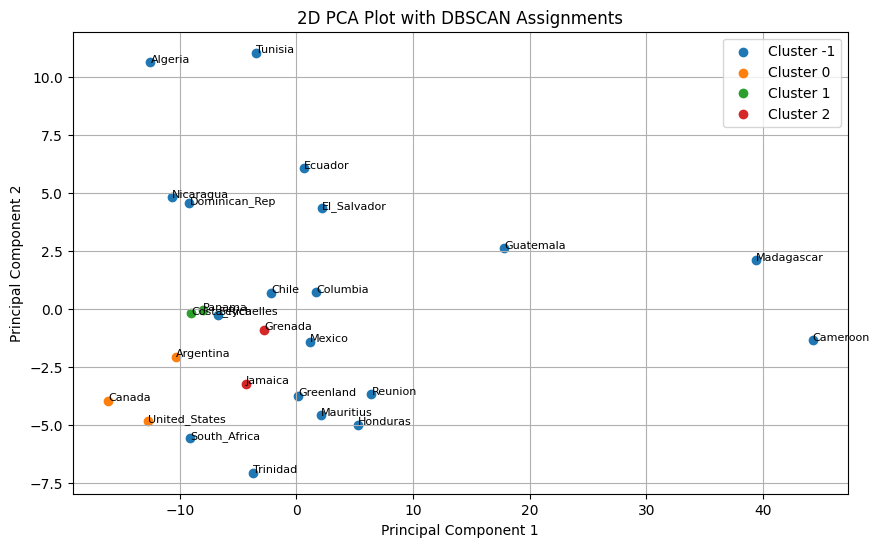

In [ ]:
# Creating a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(dbscan_labels):
    plt.scatter(df_pca.loc[dbscan_labels == cluster, 'PC1'],
                df_pca.loc[dbscan_labels == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(df.index[i]), fontsize=8)

plt.title("2D PCA Plot with DBSCAN Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

No tiene mucho sentido esta solución. La posible explicación sería el tamaño de la muesstra. Vemos una limitación importante del método y porque en este caso sería más robusto y daría una solución mucho más satisfactoria y razonable.

El método de Elbow para hallar el número correcto de clústeres a crear.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Create an array to store the WCSS values for different values of K:
wcss = []

for k in range(1, 11):  # You can choose a different range of K values
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plot the WCSS values against the number of clusters (K) and look for the "elbow" point:

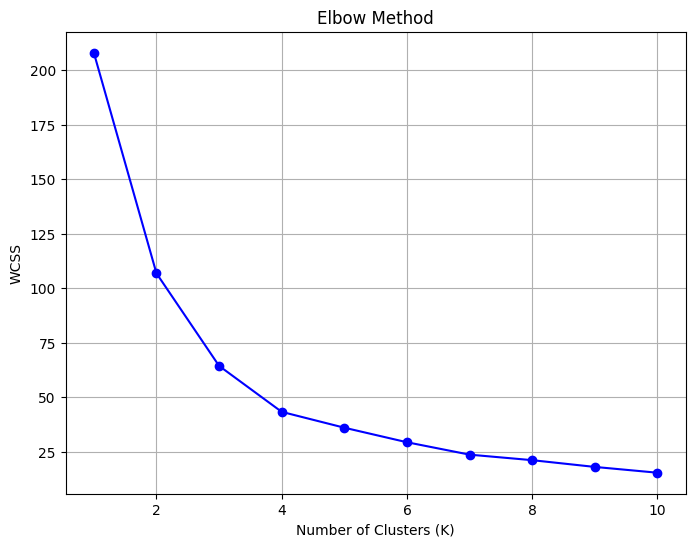

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Otro método es el de las siluetas

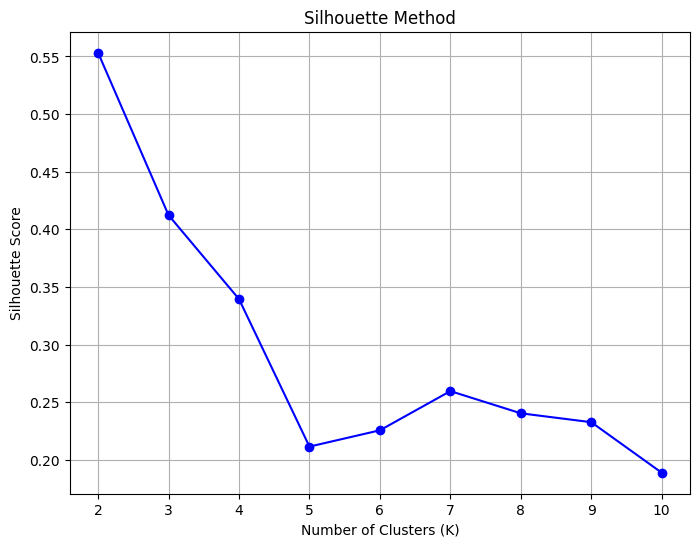

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Create an array to store silhouette scores for different values of K

silhouette_scores = []

#Run K-means clustering for a range of K values and calculate the silhouette score for each K:

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_std, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_samples


Run K-means clustering with the optimal number of clusters (determined using the Silhouette Method) and obtain cluster labels for each data point:

In [ ]:
# Assuming 'df_std_distance' is your standardized data and '4' is the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_std)
labels = kmeans.labels_

Calculates silouhette scores for each clúster

In [ ]:
silhouette_values = silhouette_samples(df_std, labels)
silhouette_values

array([ 0.41474025,  0.71161564,  0.64807433,  0.42956603,  0.30980004,
        0.35360131,  0.22675528,  0.19380903,  0.4470536 ,  0.50410114,
       -0.12873387,  0.33044631,  0.30745661,  0.27880518,  0.27557   ,
        0.45235498,  0.18609043,  0.04774938,  0.2779476 ,  0.48800548,
        0.27118869,  0.44893332,  0.52424137,  0.38152994,  0.12458923,
        0.32183229])

<ipython-input-25-6cd1bcea6981>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / 4)


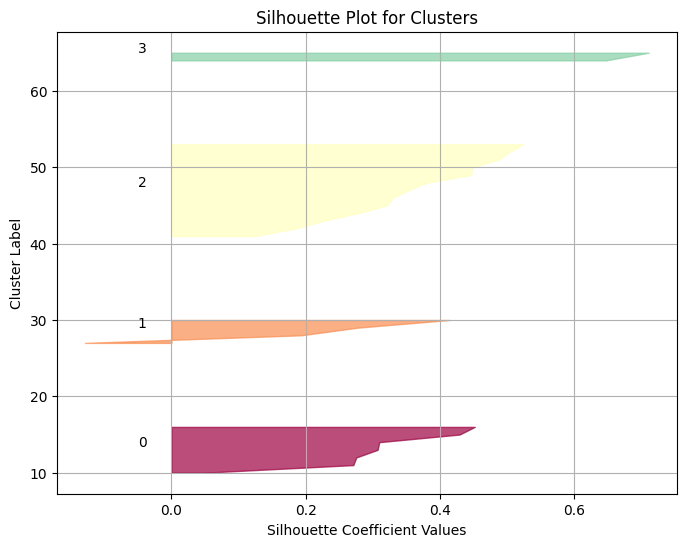

In [ ]:
plt.figure(figsize=(8, 6))

y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / 4)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()


sort by labels para caracterizar los clusters

In [ ]:
# Add the labels as a new column to the DataFrame
df_std['label'] = labels
# Sort the DataFrame by the "label" column
df_std_sort = df_std.sort_values(by="label")
# Set the 'A' column as the index
df_std = df_std.set_index(PAIS_labels)
df_std_sort['label']

1     0
2     0
25    1
23    1
22    1
5     1
6     1
21    1
8     1
9     1
19    1
11    1
24    1
13    1
16    1
18    2
0     2
10    2
7     2
17    3
14    3
20    3
4     3
3     3
15    3
12    3
Name: label, dtype: int32

In [ ]:
# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids = df_std_sort.groupby('label').mean()
cluster_centroids.round(2)
# 'cluster_centroids' now contains the centroids of each cluster

,m0,m25,m50,m75,w0,w25,w50,w75
label,,,,,,,,
0,-2.92,-2.86,-2.30,-1.16,-2.91,-2.81,-2.27,-1.37
1,0.42,0.32,0.27,0.04,0.45,0.40,0.26,0.11
2,0.36,1.03,1.21,1.79,0.28,0.98,1.42,1.57
3,-0.15,-0.36,-0.54,-0.76,-0.17,-0.51,-0.64,-0.71


Lo mismo pero con los datos originales

In [ ]:
# Add the labels as a new column to the DataFrame
df['label'] = labels
# Sort the DataFrame by the "label" column
df_sort = df.sort_values(by="label")

# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids_orig = df_sort.groupby('label').mean()
cluster_centroids_orig.round(2)
# 'cluster_centroids' now contains the centroids of each cluster

,m0,m25,m50,m75,w0,w25,w50,w75,Cluster4
label,,,,,,,,,
0,36.00,29.50,15.00,6.00,38.00,33.00,18.50,6.50,1.00
1,62.46,45.23,24.15,8.54,67.46,49.54,27.23,10.54,4.00
2,62.00,48.75,27.50,12.25,66.00,52.50,31.25,14.50,2.00
3,58.00,41.86,21.29,6.86,62.00,44.86,24.14,8.29,3.14
